<a href="https://colab.research.google.com/github/AlanFirmino2024/projeto_cd/blob/main/main_2309.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto da disciplina de Tópicos de projetos 4**

##     Alan Firmino da Silva

# **1. Definição do problema**

O *dataset* utilizado nesse projeto será o **Imóveis**, proveniente do curso de Data Science da Alura (Alura é a maior escola de tecnologia do Brasil). Seu objetivo é prever os valores dos imóveis residenciais, com base nos atributos de imóveis presentes no *dataset*.

Como o *dataset* possui dados de imóveis residenciais e comerciais, há a necessidade de fazer um filtro posteriormente. Outro ponto importante para salientar, é que no *dataset* há 21 atributos e usaremos apenas 14 deles.

O *dataset* está em um formato não convencional (**JSON**) ao que foi visto na disciplina (**CSV**), por isso faremos um breve tutorial de como visualizar esses dados com o arquivo, apenas para conhecimento.


## Tutorial de como visualizar um arquivo JSON

Primeiro abra o arquivo JSON em seu computador com o bloco de notas, e copie um trecho do texto. A seguir entre no site [JSON Viewer](http://jsonviewer.stack.hu) e na aba ***Text***, cole o texto copiado, como mostrado na figura abaixo.
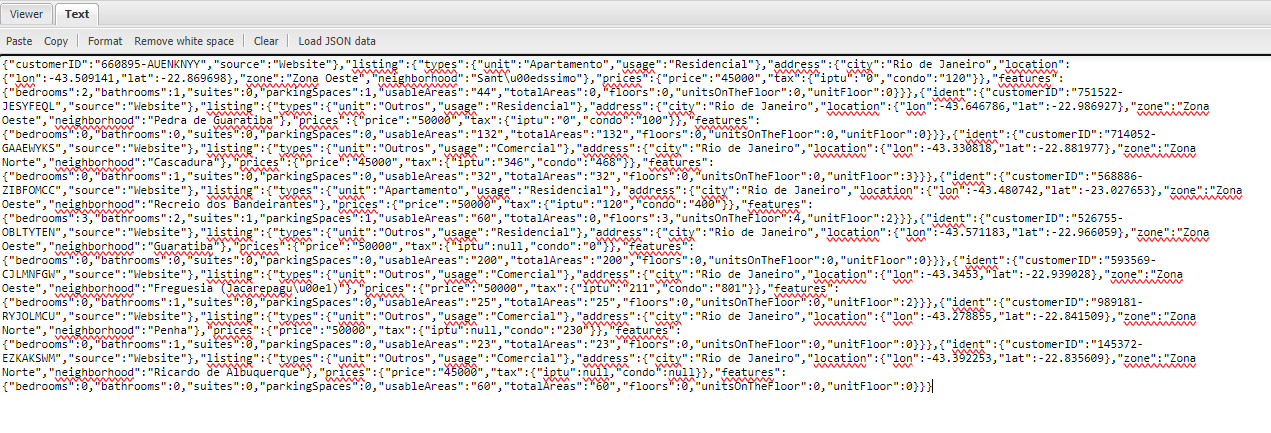

Após isso, clique no botão *Format* e veremos que a estrutura do arquivo é muito similar ao do dicionário no *Python*. Como é mostrado na figura abaixo.

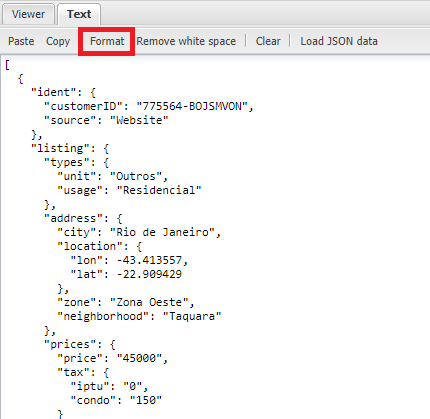

## Informações sobre os atributos.

1. **unit**: Identificador único do imóvel.
2. **zone**: Zona ou região da cidade (bairro ou distrito) onde o imóvel está localizado.
3. **price**: Preço total do imóvel.
4. **tax_iptu**: Valor do IPTU.
5. **tax_condo**: Valor mensal da taxa de condomínio.
6. **bedrooms**: Número de quartos no imóvel.
7. **bathrooms**: Número de banheiros no imóvel.
8. **suites**: Número de suítes.
9. **parkingSpaces**: Número de vagas de garagem disponíveis.
10. **usableAreas**: Área útil do imóvel.
11. **totalAreas**: Área total do imóvel.
12. **floors**: Número de andares do imóvel.
13. **unitsOnTheFloor**: Número de unidades (apartamentos) por andar.
14. **unitFloor**: Andar específico onde o imóvel está localizado.


In [194]:
# Imports
import requests
import json
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# **2. Carga dos dados**

In [195]:
# URL do arquivo JSON bruto no GitHub
url = "https://raw.githubusercontent.com/AlanFirmino2024/projeto_cd/main/imoveis.json"

dados_1 = pd.read_json(url, orient='columns')
dados_1.head()

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."


## 2.1 Normalização dos dados

In [196]:
# Transformando o bloco ident do arquivo JSON em DataFrame
df1 = pd.json_normalize(dados_1.ident)
df1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [197]:
# Transformando o bloco listing do arquivo JSON em DataFrame
df2 = pd.json_normalize(dados_1.listing, sep='_')
df2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


## 2.2 Junção dos dataframes

In [198]:
dados = pd.concat([df1, df2], axis=1)
dados.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


# **3. Análise dos dados**

## 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [199]:
# Mostra as dimensões do dataset
dados.shape

(73615, 21)

In [200]:
# Mostra as informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73615 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                73615 non-null  object 
 1   source                    73615 non-null  object 
 2   types_unit                73615 non-null  object 
 3   types_usage               73615 non-null  object 
 4   address_city              73615 non-null  object 
 5   address_location_lon      73468 non-null  float64
 6   address_location_lat      73468 non-null  float64
 7   address_zone              73615 non-null  object 
 8   address_neighborhood      73615 non-null  object 
 9   prices_price              73615 non-null  object 
 10  prices_tax_iptu           64499 non-null  object 
 11  prices_tax_condo          67111 non-null  object 
 12  features_bedrooms         73615 non-null  int64  
 13  features_bathrooms        73615 non-null  int64  
 14  featur

In [201]:
# Mostra as 10 primeiras linhas do dataset
dados.head(10)

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0
6,593569-CJLMNFGW,Website,Outros,Comercial,Rio de Janeiro,-43.345300,-22.939028,Zona Oeste,Freguesia (Jacarepaguá),50000,...,801,0,1,0,0,25,25,0,0,2
7,989181-RYJOLMCU,Website,Outros,Comercial,Rio de Janeiro,-43.278855,-22.841509,Zona Norte,Penha,50000,...,230,0,1,0,0,23,23,0,0,0
8,145372-EZKAKSWM,Website,Outros,Comercial,Rio de Janeiro,-43.392253,-22.835609,Zona Norte,Ricardo de Albuquerque,45000,...,None,0,0,0,0,60,60,0,0,0
9,792086-NWNQTDYL,Website,Apartamento,Residencial,Rio de Janeiro,-43.253044,-22.885306,Zona Norte,Jacarezinho,45336,...,0,1,1,0,1,33,35,0,0,0


In [202]:
# Mostra as 10 últimas linhas do dataset
dados.tail(10)

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
73605,629111-ZUUXUTKV,Website,Apartamento,Residencial,Rio de Janeiro,-43.206965,-22.970864,Zona Sul,Lagoa,10000000,...,6075,5,6,5,4,570,570,0,0,0
73606,171852-IMEEBBUI,Website,Casa,Residencial,Rio de Janeiro,-43.250934,-22.998918,Zona Sul,São Conrado,10000000,...,1850,3,5,3,2,1100,1257,0,0,4
73607,208599-RVPKBKWS,Website,Apartamento,Residencial,Rio de Janeiro,-43.190142,-22.983599,Zona Sul,Copacabana,10000000,...,3000,5,10,5,2,680,680,0,0,0
73608,967266-ZSRQSJXA,Website,Apartamento,Residencial,Rio de Janeiro,-43.227045,-22.986186,Zona Sul,Leblon,10000000,...,7800,4,4,2,2,400,400,0,0,0
73609,023382-CWENJTYQ,Website,Casa,Residencial,Rio de Janeiro,-43.417349,-23.002012,Zona Oeste,Barra da Tijuca,10000000,...,2373,5,6,5,5,1014,1014,2,0,0
73610,134148-MJIBCMDQ,Website,Casa,Residencial,Rio de Janeiro,-43.388906,-23.003960,Zona Oeste,Barra da Tijuca,10000000,...,2350,5,10,1,4,1024,1024,0,0,0
73611,541465-QBQVXXXZ,Website,Casa,Residencial,Rio de Janeiro,-43.395032,-23.000902,Zona Oeste,Barra da Tijuca,10000000,...,3000,5,7,5,6,750,1250,0,0,0
73612,800542-BZREFTQS,Website,Apartamento,Residencial,Rio de Janeiro,-43.189682,-22.987018,Zona Sul,Copacabana,10000000,...,None,4,5,4,3,328,328,0,0,0
73613,939419-ECGUNTIH,Website,Casa,Residencial,Rio de Janeiro,-43.351836,-23.005037,Zona Oeste,Barra da Tijuca,10000000,...,2400,5,10,5,4,1024,1024,0,0,3
73614,610503-VULDJJZZ,Website,Apartamento,Residencial,Rio de Janeiro,-43.317740,-23.009397,Zona Oeste,Barra da Tijuca,10000000,...,1800,5,8,5,6,730,730,3,1,0


A partir de uma análise mais profunda das informações, vemos que, além dos dados faltantes, há alguns atributos com o tipo*(Dtype)* errados. É o que acontece com os atributos: ***price_price, price_tax_iptu, price_tax_condo, features_usuableAreas, features_totalAreas.***

Podemos ver com mais detalhes abaixo.

In [203]:
# Verifica o tipo de dataset de cada atributo
dados.dtypes

,0
customerID,object
source,object
types_unit,object
types_usage,object
address_city,object
address_location_lon,float64
address_location_lat,float64
address_zone,object
address_neighborhood,object
prices_price,object


Como vimos anteriormente, há a necessidade de realizar a conversão de alguns tipos de alguns atributos antes de fazer o resumo estatístico.

In [204]:
#Convertendo os tipos dos atributos que estão errados
dados = dados.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64',
})

# Mostra as informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73615 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                73615 non-null  object 
 1   source                    73615 non-null  object 
 2   types_unit                73615 non-null  object 
 3   types_usage               73615 non-null  object 
 4   address_city              73615 non-null  object 
 5   address_location_lon      73468 non-null  float64
 6   address_location_lat      73468 non-null  float64
 7   address_zone              73615 non-null  object 
 8   address_neighborhood      73615 non-null  object 
 9   prices_price              73615 non-null  float64
 10  prices_tax_iptu           64499 non-null  float64
 11  prices_tax_condo          67111 non-null  float64
 12  features_bedrooms         73615 non-null  int64  
 13  features_bathrooms        73615 non-null  int64  
 14  featur

Antes de fazermos o resumo estatístico, é bom salientar que não utilizaremos todos os dados do *dataset*, uma vez que precisamos apenas dos que são imóveis residenciais.

Faremos outro resumo estatístico após tratar os dados.

In [205]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dados.describe()

,address_location_lon,address_location_lat,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
count,73468.000000,73468.000000,7.361500e+04,6.449900e+04,6.711100e+04,73615.000000,73615.000000,73615.000000,73615.000000,73615.000000,7.361500e+04,73615.000000,73615.000000,73615.000000
mean,-43.314285,-22.954546,1.210759e+06,4.663216e+03,3.565249e+03,2.573973,2.372397,1.074659,1.408911,141.544359,1.688667e+03,1.931943,1.220512,1.493514
std,0.138098,0.107919,1.384725e+06,2.064977e+05,8.167195e+04,1.281091,1.533557,1.177324,1.727358,146.736952,1.733934e+05,4.528962,3.413755,13.117324
min,-51.075631,-43.519130,4.500000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,-43.386736,-22.989900,3.990000e+05,6.700000e+01,4.090000e+02,2.000000,1.000000,0.000000,1.000000,65.000000,5.800000e+01,0.000000,0.000000,0.000000
50%,-43.320145,-22.964210,7.000000e+05,3.900000e+02,8.000000e+02,3.000000,2.000000,1.000000,1.000000,90.000000,8.600000e+01,0.000000,0.000000,0.000000
75%,-43.211893,-22.923334,1.400000e+06,1.500000e+03,1.400000e+03,3.000000,3.000000,1.000000,2.000000,158.000000,1.580000e+02,0.000000,0.000000,1.000000
max,-22.928173,-8.139998,1.000000e+07,2.900000e+07,9.900000e+06,50.000000,49.000000,50.000000,180.000000,1917.000000,2.737500e+07,50.000000,76.000000,1234.000000


# **4. Preparação dos dados**

## 4.1 Filtro

Primeiro vamos filtrar os dados para aqueles que vamos usar. Nesse caso os imóveis serão residenciais e na cidade do Rio de janeiro.

In [206]:
#Filtrando pelo tipo de imóvel e a cidade.
filtro = (dados['types_usage'] == 'Residencial') & (dados['address_city'] ==  'Rio de Janeiro')

#Aplicando o filtro
dados = dados[filtro]
dados.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


Aplicando o **".info"**, vemos que os dados que não vamos utilizar ainda estão na tabela, por esse motivo é necessário deletá-los e substituir o valor do índice.

In [207]:
#Verificação do tipo das variáveis e o índice
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

In [208]:
#Deletando dados não usuais e resetando o índice
dados.reset_index(drop=True, inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

## 4.2 Tratamento de dados

###Verificação dos valores faltantes

In [209]:
#Loop para printar cada atributo individualmente
for coluna in dados.columns:
    print('========='*10)
    print(dados[coluna].value_counts())

customerID
775564-BOJSMVON    1
569118-JPIGNPUW    1
889139-ECOBCGKE    1
513790-LDFXVAMH    1
782229-AZCMWTNZ    1
                  ..
136267-MVPRYBVB    1
197819-AKAPUWEI    1
152333-HEVFWYQK    1
042353-IJYUMNMW    1
610503-VULDJJZZ    1
Name: count, Length: 69588, dtype: int64
source
Website    69588
Name: count, dtype: int64
types_unit
Apartamento    59099
Casa            9299
Outros          1190
Name: count, dtype: int64
types_usage
Residencial    69588
Name: count, dtype: int64
address_city
Rio de Janeiro    69588
Name: count, dtype: int64
address_location_lon
-43.365895    387
-43.462590    277
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.470135      1
-43.249103      1
-43.521357      1
-43.253379      1
-43.250934      1
Name: count, Length: 24477, dtype: int64
address_location_lat
-23.000371    387
-23.017479    277
-22.937463    236
-22.966600    232
-23.015968    218
             ... 
-22.973647      1
-22.928118      1
-22.923647      1
-2

Nessa linha de código abaixo verifica a quantidade de valores nulos no *dataset*.

In [210]:
# verificando nulls no dataset
dados.isnull().sum()

,0
customerID,0
source,0
types_unit,0
types_usage,0
address_city,0
address_location_lon,139
address_location_lat,139
address_zone,0
address_neighborhood,0
prices_price,0


### Tratando os valores vazios na zona

A partir da verificação dos dados vemos que no atributo zona, há valores vazio e não nulos. Como há todos os bairros e ele está diretamente ligado com a zona, podemos verificar a partir do bairro qual será a zona faltante.

In [211]:
#Substituindo as células vazias do atributo zona por NaN
dados['address_zone'] = dados['address_zone'].replace('', np.nan)

In [212]:
#verificação dos números nulos
dados.address_zone.isnull().sum()

149

In [213]:
#Relaciona a zona e o bairro. Neste caso, remove-se as duplicatas.
dici = dados[~dados['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')

In [214]:
#Cria um dicionário relacionando bairro e zona.
dic_zonas = {dic['address_neighborhood']: dic['address_zone'] for dic in dici}
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [215]:
#Loop que atribui o valor à zona com base no bairro.
for bairro,zona in dic_zonas.items():
  dados.loc[dados['address_neighborhood'] == bairro, 'address_zone'] = zona

In [216]:
#Verificação dos números nulos
dados['address_zone'].isnull().sum()

0

### Tratando valores faltantes na taxa de IPTU e Condomínio

In [217]:
#Verificação dos valores faltantes da taxa de condomínio
dados['prices_tax_condo'].isnull().sum()

6061

In [218]:
#Verificação dos valores faltantes da taxa de IPTU
dados['prices_tax_iptu'].isnull().sum()

8725

Bom, poderiamos utilizar a mesma lógica de substituição como fizemos para a zona. Porém, esses valores são muito relativos de rua por rua.

Nesse caso, há duas opções que são:


*   Excluir os valores faltantes.
*   Assumir que esses valores são zero.

Após análises, assumimos que é melhor deixar esses valores como zero. Assim, temos que substituir esses valores faltantes com zero.



In [219]:
dados.prices_tax_iptu.fillna(0, inplace=True)
dados.prices_tax_condo.fillna(0, inplace=True)

In [220]:
#Verificação dos valores faltantes da taxa de condomínio
dados['prices_tax_condo'].isnull().sum()

0

In [221]:
#Verificação dos valores faltantes da taxa de IPTU
dados['prices_tax_iptu'].isnull().sum()

0

## 4.3 Selecionando as variáveis

Poderiamos ter feito isso antes, porém para manter a sequência lógica do tratamento de dados, achou-se conveniente fazer esse tratamento agora.

Como falamos na descrição do problema, vamos utilizar apenas 14 dos 21 atributos do *dataset*.

In [222]:
#Exclusão dos atributos que não serão necessários
dados.drop(['customerID', 'source', 'types_usage', 'address_city',
                    'address_location_lon', 'address_location_lat','address_neighborhood' ], axis = 1, inplace=True)

### Renomeando as variáveis

In [223]:
dicionario_atributos = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}

dados = dados.rename(dicionario_atributos, axis = 1)
dados.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


In [224]:
#Verificação de dados faltantes
dados.isnull().sum()

,0
unit,0
zone,0
price,0
tax_iptu,0
tax_condo,0
bedrooms,0
bathrooms,0
suites,0
parkingSpaces,0
usableAreas,0


## 4.3 Vizualições Unimodais e Multimodais

Como ja tratamos os dados, vamos realizar novamente o resumo estatístico e verificar por vizualizações unimodais e multimodais.

In [226]:
#Resumo estatístico
dados.describe()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
count,6.958800e+04,6.958800e+04,6.958800e+04,69588.000000,69588.000000,69588.000000,69588.000000,69588.00000,6.958800e+04,69588.000000,69588.000000,69588.000000
mean,1.233982e+06,3.829974e+03,3.301126e+03,2.693970,2.423952,1.130813,1.425605,141.40632,1.772376e+03,1.941499,1.155558,1.489926
std,1.390898e+06,1.785407e+05,7.943358e+04,1.077059,1.470166,1.150009,1.460542,138.95235,1.783384e+05,4.496438,2.979235,13.461909
min,4.500000e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000
25%,4.199998e+05,0.000000e+00,2.500000e+02,2.000000,1.000000,0.000000,1.000000,68.00000,6.000000e+01,0.000000,0.000000,0.000000
50%,7.350000e+05,2.500000e+02,7.500000e+02,3.000000,2.000000,1.000000,1.000000,92.00000,8.900000e+01,0.000000,0.000000,0.000000
75%,1.450000e+06,1.210000e+03,1.300000e+03,3.000000,3.000000,1.000000,2.000000,160.00000,1.590000e+02,0.000000,0.000000,1.000000
max,1.000000e+07,2.900000e+07,9.900000e+06,30.000000,25.000000,23.000000,144.000000,1911.00000,2.737500e+07,50.000000,50.000000,1234.000000


### Histograma

Vemos que os atributos ***price, bathrooms, suites e usuableAreas*** seguem uma distribuição exponencial.

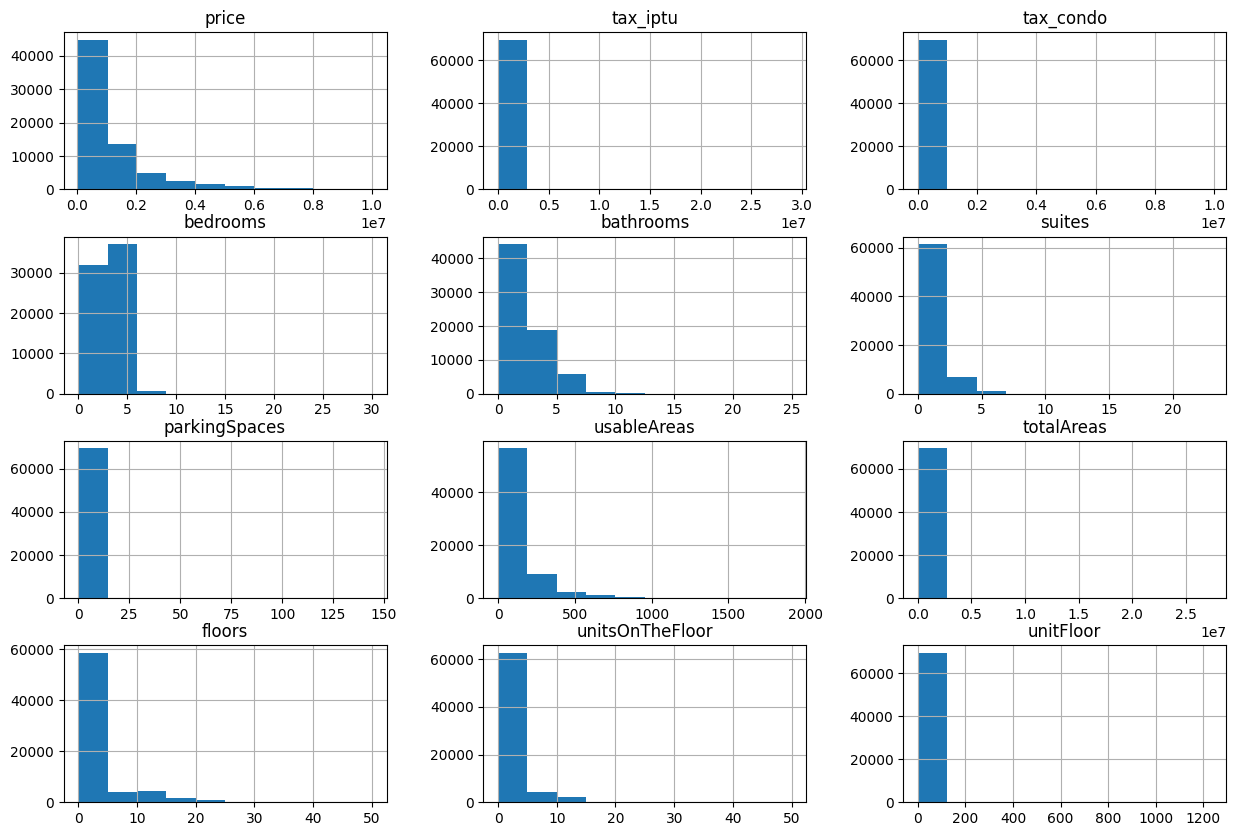

In [227]:
# Histograma
dados.hist(figsize = (15,10))
plt.show()

### Mapa de calor

Vamos utilizar o HeatMap para verificar a correlação entre as variáveis.

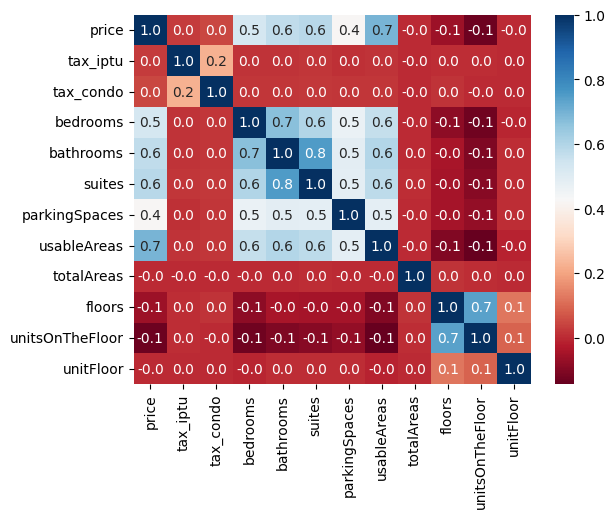

In [228]:
#visualização das correlações
dados_numericos = dados.select_dtypes(include=[float, int])
correlacao = dados_numericos.corr()
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(correlacao, annot=True,fmt='.1f', cmap='RdBu');


In [229]:
# Scatter Plot com Seaborn - Variação 2

#sns.pairplot(dados, hue = "price", height = 2.5);

## 4.4 Treino e teste dos dados

### Transformando variáveis

Para conseguir prosseguirmos com a análise, temos que transformar o tipo de algumas variáveis. As colunas ***type*** e ***zone*** são do tipo objeto e por isso não há como treinar o modelo delas. E como são variáveis importantes para prever o preço dos imóveis, temos que considerá-los.

Para isso vamos utilizar a função dummies que consiste na transformação das variáveis categóricas a partir da criação de novas colunas a partir das categorias. Cada uma delas se torna uma nova coluna e o valor na linha correspondente será 1, caso tenha a presença da característica. Do contrário, será 0.

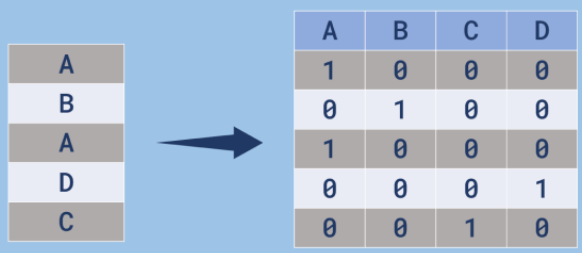

In [230]:
#Separando as variáveis do tipo objeto
variaveis_objeto = dados.select_dtypes(include=['object']).columns

#Criando variáveis dummies
df_dummies = pd.get_dummies(dados[variaveis_objeto])

#Concatenando com o conjunto de dados sem os atributos do tipo objeto
dados_numericos = pd.concat([dados.drop(variaveis_objeto, axis=1), df_dummies], axis=1)
dados_numericos.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0,False,False,True,False,False,True,False
1,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0,True,False,False,False,False,True,False
2,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0,False,False,True,False,False,True,False
3,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2,True,False,False,False,False,True,False
4,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0,False,False,True,False,False,True,False


In [231]:
#Variáveis independentes
X = dados_numericos.drop('price', axis=1)

#Variável dependente
y = dados_numericos['price']

#Divisão em conjunto de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.25, random_state=42)

#Instanciando o modelo
model = LinearRegression()

#Treinando o conjunto de dados
model.fit(X_treino, y_treino)

#Prevendo o modelo
y_pred = model.predict(X_teste)

#Exibindo o resultado
print(y_pred)

[ 553547.04563822   15449.19817618  758620.8573178  ...  -11061.23884495
 1348195.88902784   87506.37487299]


In [232]:
#Prediz os valores de y para os dados de treino.
y_treino_pred = model.predict(X_treino)
#Prediz os valores de y para os dados de teste.
y_teste_pred = model.predict(X_teste)

In [235]:
#treino_error = mean_squared_error(y_treino, y_treino_pred)
#test_error = mean_squared_error(y_teste, y_teste_pred)
r2 = r2_score(y_teste, previsao)
#print(treino_error)
#print(test_error)
print(r2)


659932609944.8013
622605848485.1106
0.6731182121604884
A mediana da coluna 'price' é: 735000.0
